<a href="datacamp.com/workspacecompetition" target="_blank">![banner](banner.png)</a>

# Loan Data

Ready to put your coding skills to the test? Join us for our Workspace Competition.  
For more information, visit [datacamp.com/workspacecompetition](https://datacamp.com/workspacecompetition) 

## Context
This dataset ([source](https://www.kaggle.com/itssuru/loan-data)) consists of data from almost 10,000 borrowers that took loans - with some paid back and others still in progress. It was extracted from lendingclub.com which is an organization that connects borrowers with investors. We've included a few suggested questions at the end of this template to help you get started.

In [1]:
# Load packages
import numpy as np 
import pandas as pd 

## Load your data

In [2]:
# Load data from the csv file
df = pd.read_csv('loan_data1.csv', index_col=None)

# Change the dots in the column names to underscores
df.columns = [c.replace(".", "_") for c in df.columns]
print(f"Number of rows/records: {df.shape[0]}")
print(f"Number of columns/variables: {df.shape[1]}")
df.head()

Number of rows/records: 9578
Number of columns/variables: 14


,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
variables = pd.DataFrame(columns=['Variable','Number of unique values','Values'])
for i, var in enumerate(df.columns):
    variables.loc[i] = [var, df[var].nunique(), df[var].unique().tolist()]
variables.head()

,Variable,Number of unique values,Values
0,credit_policy,2,"[1, 0]"
1,purpose,7,"[debt_consolidation, credit_card, all_other, h..."
2,int_rate,249,"[0.1189, 0.1071, 0.1357, 0.1008, 0.1426, 0.078..."
3,installment,4788,"[829.1, 228.22, 366.86, 162.34, 102.92, 125.13..."
4,log_annual_inc,1987,"[11.35040654, 11.08214255, 10.37349118, 11.299..."


In [4]:
from pandas import option_context
var_dict = pd.read_csv('variable_explanation.csv', index_col=0)

with option_context('display.max_colwidth', 400):
    display(var_dict)

,Explanation
Variable,
credit_policy,1 if the customer meets the credit underwriting criteria; 0 otherwise.
purpose,The purpose of the loan.
int_rate,The interest rate of the loan (more risky borrowers are assigned higher interest rates).
installment,The monthly installments owed by the borrower if the loan is funded.
log_annual_inc,The natural log of the self-reported annual income of the borrower.
dti,The debt-to-income ratio of the borrower (amount of debt divided by annual income).
fico,The FICO credit score of the borrower.
days_with_cr_line,The number of days the borrower has had a credit line.
revol_bal,The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).


## Understand your variables

In [3]:
# Understand your variables
variables = pd.DataFrame(columns=['Variable','Number of unique values','Number of nulls','Values'])

for i, var in enumerate(df.columns):
    variables.loc[i] = [var, df[var].nunique(),df[var].isnull().sum(), df[var].unique().tolist()]
    
# Join with the variables dataframe
var_dict = pd.read_csv('variable_explanation.csv', index_col=0)
variables.set_index('Variable').join(var_dict)

,Number of unique values,Number of nulls,Values,Explanation
Variable,,,,
credit_policy,2,0,"[1, 0]",1 if the customer meets the credit underwritin...
purpose,7,0,"[debt_consolidation, credit_card, all_other, h...",The purpose of the loan.
int_rate,249,0,"[0.1189, 0.1071, 0.1357, 0.1008, 0.1426, 0.078...",The interest rate of the loan (more risky borr...
installment,4788,0,"[829.1, 228.22, 366.86, 162.34, 102.92, 125.13...",The monthly installments owed by the borrower ...
log_annual_inc,1987,0,"[11.35040654, 11.08214255, 10.37349118, 11.299...",The natural log of the self-reported annual in...
dti,2529,0,"[19.48, 14.29, 11.63, 8.1, 14.97, 16.98, 4.0, ...",The debt-to-income ratio of the borrower (amou...
fico,44,0,"[737, 707, 682, 712, 667, 727, 722, 677, 662, ...",The FICO credit score of the borrower.
days_with_cr_line,2687,0,"[5639.958333, 2760.0, 4710.0, 2699.958333, 406...",The number of days the borrower has had a cred...
revol_bal,7869,0,"[28854, 33623, 3511, 33667, 4740, 50807, 3839,...",The borrower's revolving balance (amount unpai...


In [9]:
df.columns

Index(['credit_policy', 'purpose', 'int_rate', 'installment', 'log_annual_inc',
       'dti', 'fico', 'days_with_cr_line', 'revol_bal', 'revol_util',
       'inq_last_6mths', 'delinq_2yrs', 'pub_rec', 'not_fully_paid'],
      dtype='object')

Now you can start to explore this dataset with the chance to win incredible prices! Can't think of where to start? Try your hand at these suggestions:

- Extract useful insights and visualize them in the most interesting way possible.
- Find out how long it takes for users to pay back their loan.
- Build a model that can predict the probability a user will be able to pay back their loan within a certain period.
- Find out what kind of people take a loan for what purposes.

# My solution will consist of the following:
###      1. Initial data exploration and pre-processiong
###      2. EDA: Visualising data
###      3. Feature selection
###      5. Correlation and PCA Analysis
###      6. Modelling the loan payoff
###      7. Predicting the loan payoff


# 1. Initial data exploration

In [59]:
df.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int_rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log_annual_inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days_with_cr_line  9578 non-null   float64
 8   revol_bal          9578 non-null   int64  
 9   revol_util         9578 non-null   float64
 10  inq_last_6mths     9578 non-null   int64  
 11  delinq_2yrs        9578 non-null   int64  
 12  pub_rec            9578 non-null   int64  
 13  not_fully_paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [3]:
df.days_with_cr_line = df.days_with_cr_line.astype(int).round() # rounding up days

In [4]:
df['not_fully_paid'].replace({0:1,1:0},inplace=True)    # swap values
df.rename(columns={'not_fully_paid':'fully_paid'},inplace=True)
df.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639,28854,52.1,0,0,0,1
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760,33623,76.7,0,0,0,1
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710,3511,25.6,1,0,0,1
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699,33667,73.2,1,0,0,1
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066,4740,39.5,0,1,0,1


In [7]:
df['fully_paid'].value_counts()

1    8045
0    1533
Name: fully_paid, dtype: int64

#### Splitting features into numeric and non-numeric

In [5]:
numfeatures = ['credit_policy', 'int_rate', 'installment', 'log_annual_inc', 'dti', 'fico', 'days_with_cr_line', 'revol_bal', 'revol_util', 'inq_last_6mths', 'delinq_2yrs', 'pub_rec']
non_numfeatures = ['purpose']

In [6]:
df_num = df[numfeatures]
df_num.head()

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec
0,1,0.1189,829.10,11.350407,19.48,737,5639,28854,52.1,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760,33623,76.7,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710,3511,25.6,1,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699,33667,73.2,1,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066,4740,39.5,0,1,0


# 2. Visualising data 

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
#sns.set_theme(style="whitegrid")

 -Distribution of numeric features- 


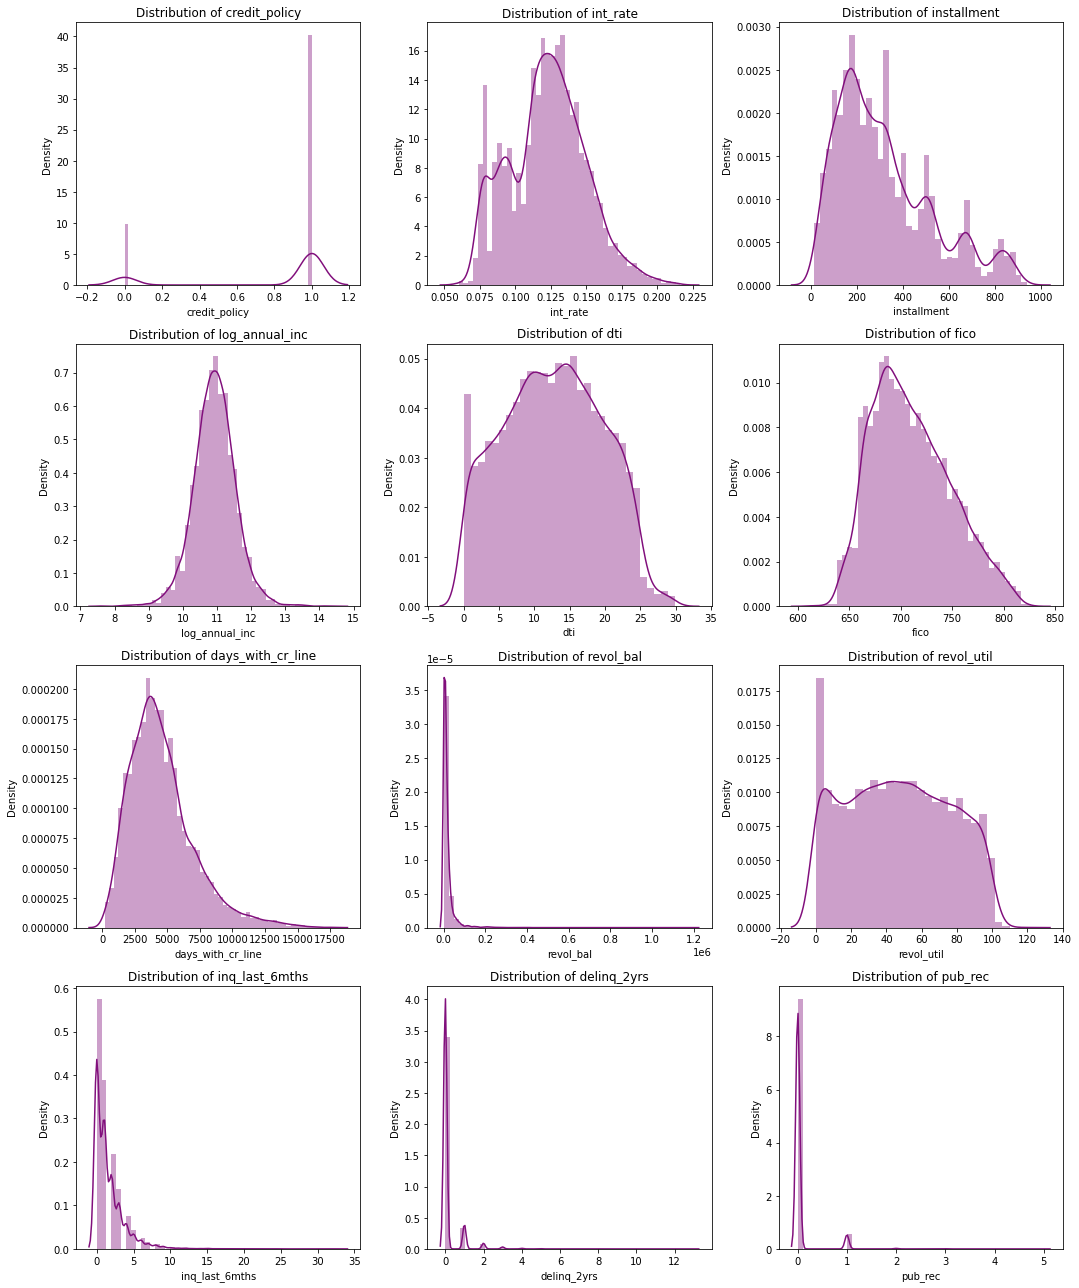

In [13]:
print(f' -Distribution of numeric features- ')
plt.figure(figsize=(15, 18))
for i, col in enumerate(numfeatures):
    # Plot distribution 
    plt.subplot(4,3,i+1); sns.distplot(df_num[col], color='#810F7C')
    plt.title(f'Distribution of {col}')
# Show the plot
plt.tight_layout()
plt.show()


<span style="color:black; font-size:20px" > Some features like **log_annual_inc, fico and days_with_cr_line** appear while all the other features are highly skewed.
This can pose a problem when modelling as most machine learning models require features to be normally distributed. Therefore I will perform scaling before using these features. </span>


 ### Does a loan purpose affect is repayment?
 


<span style="color:black; font-size:20px" > Lets look at the loan purposes. Most people take loans for debt consolidation, credit card debt or other purposes.
Meanwhile, paid and not paid loans do not seem to differ much by purpose i.e. a purpose does not seem to be a useful prediction feature. </span>

In [8]:
s_sort= df.groupby('purpose')['fully_paid'].value_counts()
df_sort = s_sort.to_frame()

df_sort.rename(columns={'fully_paid':'count_purpose'},inplace=True)

df_sort.reset_index(inplace=True)
df_sort.rename(columns={'fully_paid':'loan_status'},inplace=True)
df_sort['loan_status'].replace({1:'Fully paid',0:'Not fully paid'},inplace=True)  
df_sort.sort_values(by=['count_purpose'], ascending=False, inplace=True)
df_sort.head()

,purpose,loan_status,count_purpose
4,debt_consolidation,Fully paid,3354
0,all_other,Fully paid,1944
2,credit_card,Fully paid,1116
5,debt_consolidation,Not fully paid,603
8,home_improvement,Fully paid,522


In [9]:
df_ = df_sort.groupby(by = 'loan_status').sum().T
dfn = df_.rename(index={'count_purpose': ''})
dfn

loan_status,Fully paid,Not fully paid
,8045,1533


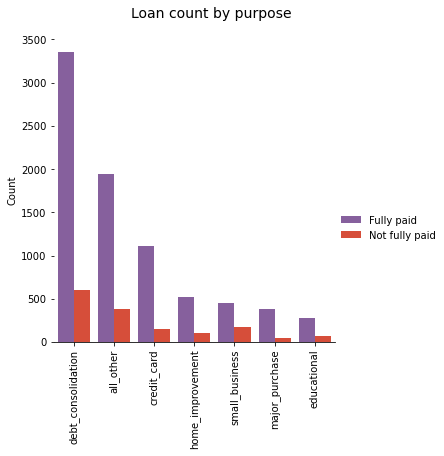

In [10]:
# Lets plot the loan purpose data.
plot = sns.catplot(data=df_sort, kind="bar",x="purpose", y="count_purpose", palette=['#8856a7', '#f03b20'], hue="loan_status" )

plot.legend.set_title("")
plot.set_axis_labels("", "Count")
            
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)#.set(title='Title of Plot')

plot.fig.suptitle('Loan count by purpose', y=1.05, fontsize=14)

plot.despine(left=True)

<span style="color:black; font-size:20px" > **Small business** is the purpose with the highest proportion of unpaid loans. </span>

In [11]:
df1 = df.copy()
df1['fully_paid'].replace({0:'Not fully paid',1: 'Fully paid'}, inplace=True)
df1.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639,28854,52.1,0,0,0,Fully paid
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760,33623,76.7,0,0,0,Fully paid
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710,3511,25.6,1,0,0,Fully paid
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699,33667,73.2,1,0,0,Fully paid
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066,4740,39.5,0,1,0,Fully paid


In [112]:
df.fully_paid.value_counts(normalize=True).round(2)

Fully paid        0.84
Not fully paid    0.16
Name: fully_paid, dtype: float64

In [13]:
dfn['total'] = dfn['Fully paid']+dfn['Not fully paid']
dfn

loan_status,Fully paid,Not fully paid,total
,8045,1533,9578


In [14]:
df_rel = (dfn[dfn.columns[0:2]].div(dfn.iloc[0, 2])*100).round(2)
df_rel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries,  to 
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Fully paid      1 non-null      float64
 1   Not fully paid  1 non-null      float64
dtypes: float64(2)
memory usage: 24.0+ bytes


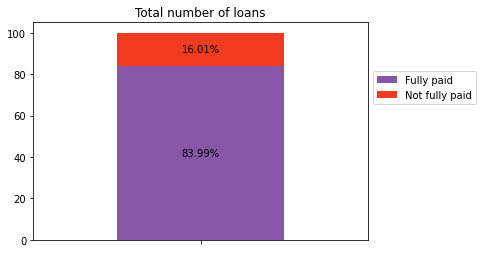

In [32]:
myplot = df_rel.plot( kind='bar',stacked = True,color= ['#8856a7', '#f03b20'], title="Total number of loans") # this is ok
h = 0
for col in df_rel:
    #h += (p := df_rel[col].iat[0])      # calculate current bar height
    p = df_rel[col].iloc[0]
    h += p
    plt.text(0, h - p / 2, f'{p}%', va='center', ha='center')
myplot.legend(bbox_to_anchor=(1.0, 0.8))
plt.show()

<span style="color:black; font-size:20px" > We can see that around 16% of loans are not fully paid, so this is an imbalanced dataset. </span>

### How long it takes for users to pay back their loans?
I assume this could be measured by the number of days a successful borrower has had a credit line for.

In [16]:
df_paid = df.loc[df.fully_paid ==1].head()

#df_paid.days_with_cr_line.describe()

In [17]:
print('How many days on average the users had a credit line: {:.0f} days'.format(df_paid.days_with_cr_line.mean()))
print('Most users had a credit line for: {:.0f} days'.format(df_paid.days_with_cr_line.mode().round()[0]))
print('The users had a credit line from {:.0f} to {:.0f} days'.format(df_paid.days_with_cr_line.min().round(), df_paid.days_with_cr_line.max().round()))

How many days on average the users had a credit line: 3975 days
Most users had a credit line for: 2699 days
The users had a credit line from 2699 to 5639 days


## Exploring features by visualisation

In [14]:
s_sort= df.groupby('purpose')['fully_paid'].value_counts()
df_sort = s_sort.to_frame()

df_sort.rename(columns={'fully_paid':'count_purpose'},inplace=True)

df_sort.reset_index(inplace=True)
df_sort.rename(columns={'fully_paid':'loan_status'},inplace=True)
df_sort['loan_status'].replace({1:'Fully paid',0:'Not fully paid'},inplace=True)  
df_sort.sort_values(by=['count_purpose'], ascending=False, inplace=True)
df_sort

,purpose,loan_status,count_purpose
4,debt_consolidation,Fully paid,3354
0,all_other,Fully paid,1944
2,credit_card,Fully paid,1116
5,debt_consolidation,Not fully paid,603
8,home_improvement,Fully paid,522
12,small_business,Fully paid,447
10,major_purchase,Fully paid,388
1,all_other,Not fully paid,387
6,educational,Fully paid,274
13,small_business,Not fully paid,172


In [18]:
s_sort_i= df.groupby('int_rate')['fully_paid'].value_counts()
df_sort_i = s_sort_i.to_frame()

df_sort_i.rename(columns={'fully_paid':'count_intrate'},inplace=True)

df_sort_i.reset_index(inplace=True)
df_sort_i.rename(columns={'fully_paid':'loan_status'},inplace=True)
df_sort_i['loan_status'].replace({1:'Fully paid',0:'Not fully paid'},inplace=True)  
df_sort_i.sort_values(by=['count_intrate'], ascending=False, inplace=True)
df_sort_i

# 'int_rate','days_with_cr_line','log_annual_inc','fico'

,int_rate,loan_status,count_intrate
171,0.1253,Fully paid,302
38,0.0894,Fully paid,275
141,0.1183,Fully paid,218
24,0.0800,Fully paid,188
56,0.0963,Fully paid,186
...,...,...,...
314,0.1551,Not fully paid,1
316,0.1557,Not fully paid,1
413,0.1793,Not fully paid,1
68,0.1001,Not fully paid,1


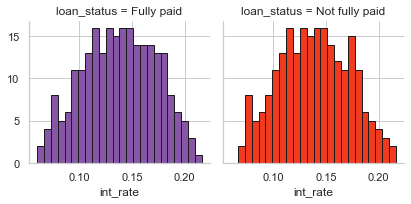

In [19]:
# similar
bins = np.linspace(df_sort_i.int_rate.min(), df_sort_i.int_rate.max(), 25)

g = sns.FacetGrid(df_sort_i, col="loan_status", hue="loan_status", palette=['#8856a7', '#f03b20'], col_wrap=2)
g.map(plt.hist, 'int_rate', bins=bins, ec="k")


plt.show()

In [20]:
s_sort_d= df.groupby('days_with_cr_line')['fully_paid'].value_counts()
df_sort_d = s_sort_d.to_frame()

df_sort_d.rename(columns={'fully_paid':'count_days'},inplace=True)

df_sort_d.reset_index(inplace=True)
df_sort_d.rename(columns={'fully_paid':'loan_status'},inplace=True)
df_sort_d['loan_status'].replace({1:'Fully paid',0:'Not fully paid'},inplace=True)  
df_sort_d.sort_values(by=['count_days'], ascending=False, inplace=True)
#df_sort_d

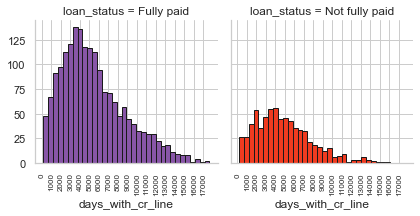

In [21]:
# more peaked and left-skewed for paid loans.
bins = np.linspace(df_sort_d.days_with_cr_line.min(), df_sort_d.days_with_cr_line.max(), 35)

g = sns.FacetGrid(df_sort_d, col="loan_status", hue="loan_status", palette=['#8856a7', '#f03b20'], col_wrap=2)
g.map(plt.hist, 'days_with_cr_line', bins=bins, ec="k")

g.set(xticks=np.arange(0,17500,1000))
g.set_xticklabels(np.arange(0,17500,1000), fontsize=8, rotation=90)
plt.show()

In [22]:
s_sort_in= df.groupby('log_annual_inc')['fully_paid'].value_counts()
df_sort_in = s_sort_in.to_frame()

df_sort_in.rename(columns={'fully_paid':'count_in'},inplace=True)

df_sort_in.reset_index(inplace=True)
df_sort_in.rename(columns={'fully_paid':'loan_status'},inplace=True)
df_sort_in['loan_status'].replace({1:'Fully paid',0:'Not fully paid'},inplace=True)  
df_sort_in.sort_values(by=['count_in'], ascending=False, inplace=True)
#df_sort_in

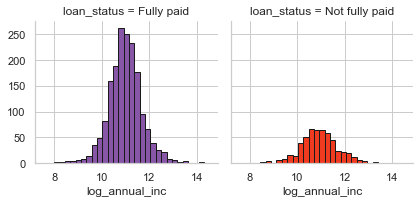

In [23]:
# more peaked for paid loans
bins = np.linspace(df_sort_in.log_annual_inc.min(), df_sort_in.log_annual_inc.max(), 32)

g = sns.FacetGrid(df_sort_in, col="loan_status", hue="loan_status", palette=['#8856a7', '#f03b20'], col_wrap=2)
g.map(plt.hist, 'log_annual_inc', bins=bins, ec="k")

plt.show()

In [24]:
s_sort_dti= df.groupby('dti')['fully_paid'].value_counts()
df_sort_dti = s_sort_dti.to_frame()

df_sort_dti.rename(columns={'fully_paid':'count_in'},inplace=True)

df_sort_dti.reset_index(inplace=True)
df_sort_dti.rename(columns={'fully_paid':'loan_status'},inplace=True)
df_sort_dti['loan_status'].replace({1:'Fully paid',0:'Not fully paid'},inplace=True)  
df_sort_dti.sort_values(by=['count_in'], ascending=False, inplace=True)
#df_sort_in

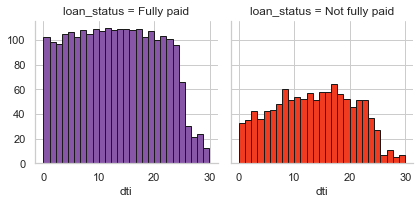

In [25]:
# more normal for not paid loans.
bins = np.linspace(df_sort_dti.dti.min(), df_sort_dti.dti.max(), 28)

g = sns.FacetGrid(df_sort_dti, col="loan_status", hue="loan_status", palette=['#8856a7', '#f03b20'], col_wrap=2)
g.map(plt.hist, 'dti', bins=bins, ec="k")

plt.show()

In [26]:
s_sort_fi= df.groupby('fico')['fully_paid'].value_counts()
df_sort_fi = s_sort_fi.to_frame()

df_sort_fi.rename(columns={'fully_paid':'count_in'},inplace=True)

df_sort_fi.reset_index(inplace=True)
df_sort_fi.rename(columns={'fully_paid':'loan_status'},inplace=True)
df_sort_fi['loan_status'].replace({1:'Fully paid',0:'Not fully paid'},inplace=True)  
df_sort_fi.sort_values(by=['count_in'], ascending=False, inplace=True)

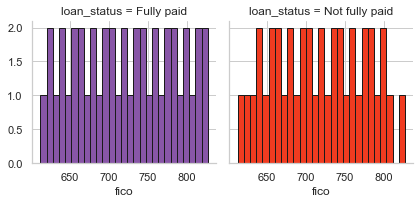

In [27]:
# seems similar
bins = np.linspace(df_sort_fi.fico.min(), df_sort_fi.fico.max(), 28)

g = sns.FacetGrid(df_sort_fi, col="loan_status", hue="loan_status", palette=['#8856a7', '#f03b20'], col_wrap=2)
g.map(plt.hist, 'fico', bins=bins, ec="k")

plt.show()

In [28]:
s_sort_ins= df.groupby('installment')['fully_paid'].value_counts()
df_sort_ins = s_sort_ins.to_frame()

df_sort_ins.rename(columns={'fully_paid':'count_in'},inplace=True)

df_sort_ins.reset_index(inplace=True)
df_sort_ins.rename(columns={'fully_paid':'loan_status'},inplace=True)
df_sort_ins['loan_status'].replace({1:'Fully paid',0:'Not fully paid'},inplace=True)  
df_sort_ins.sort_values(by=['count_in'], ascending=False, inplace=True)

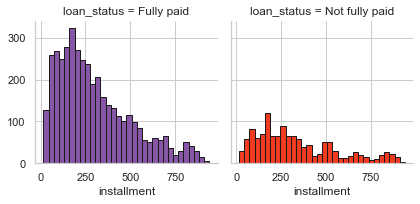

In [29]:
# more left skewed for paid loans
bins = np.linspace(df_sort_ins.installment.min(), df_sort_ins.installment.max(), 33)

g = sns.FacetGrid(df_sort_ins, col="loan_status", hue="loan_status", palette=['#8856a7', '#f03b20'], col_wrap=2)
g.map(plt.hist, 'installment', bins=bins, ec="k")

plt.show()

In [30]:
s_sort_revb= df.groupby('revol_bal')['fully_paid'].value_counts()
df_sort_revb = s_sort_revb.to_frame()
df_sort_revb.rename(columns={'fully_paid':'count_in'},inplace=True)

df_sort_revb.reset_index(inplace=True)
df_sort_revb.rename(columns={'fully_paid':'loan_status'},inplace=True)
df_sort_revb['loan_status'].replace({1:'Fully paid',0:'Not fully paid'},inplace=True)
df_sort_revb1 = df_sort_revb.loc[df_sort_revb['revol_bal'] >=50000]
df_sort_revb1.sort_values(by=['count_in'], ascending=False, inplace=True)
df_sort_revb1

,revol_bal,loan_status,count_in
8182,275925,Fully paid,2
8099,150786,Fully paid,2
8143,205347,Fully paid,2
8000,101022,Fully paid,1
7994,95564,Not fully paid,1
...,...,...,...
7800,63861,Not fully paid,1
7801,64266,Fully paid,1
7802,64362,Fully paid,1
7803,64394,Fully paid,1


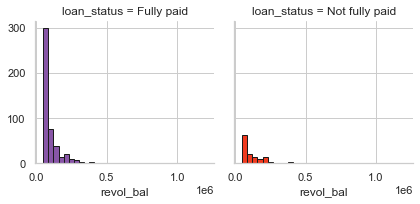

In [31]:
# similar
bins = np.linspace(df_sort_revb1.revol_bal.min(), df_sort_revb1.revol_bal.max(), 33)

g = sns.FacetGrid(df_sort_revb1, col="loan_status", hue="loan_status", palette=['#8856a7', '#f03b20'])
g.map(plt.hist, 'revol_bal', bins=bins, ec="k")

plt.show()

In [32]:
df_sort_revb

,revol_bal,loan_status,count_in
0,0,Fully paid,262
1,0,Not fully paid,59
2,1,Fully paid,4
3,1,Not fully paid,1
4,2,Fully paid,2
...,...,...,...
8195,407794,Not fully paid,1
8196,508961,Not fully paid,1
8197,602519,Fully paid,1
8198,952013,Fully paid,1


In [33]:
s_sort_revu= df.groupby('revol_util')['fully_paid'].value_counts()
df_sort_revu = s_sort_revu.to_frame()

df_sort_revu.rename(columns={'fully_paid':'count_in'},inplace=True)

df_sort_revu.reset_index(inplace=True)
df_sort_revu.rename(columns={'fully_paid':'loan_status'},inplace=True)
df_sort_revu['loan_status'].replace({1:'Fully paid',0:'Not fully paid'},inplace=True)  
df_sort_revu.sort_values(by=['count_in'], ascending=False, inplace=True)

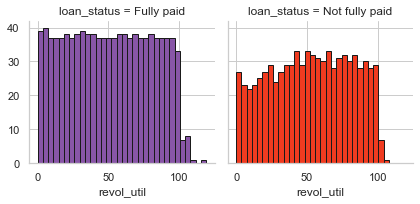

In [34]:
# more even for paid loans
bins = np.linspace(df_sort_revu.revol_util.min(), df_sort_revu.revol_util.max(), 33)

g = sns.FacetGrid(df_sort_revu, col="loan_status", hue="loan_status", palette=['#8856a7', '#f03b20'])
g.map(plt.hist, 'revol_util', bins=bins, ec="k")

plt.show()

In [35]:
s_sort_inq= df.groupby('inq_last_6mths')['fully_paid'].value_counts()
df_sort_inq = s_sort_inq.to_frame()

df_sort_inq.rename(columns={'fully_paid':'count_in'},inplace=True)

df_sort_inq.reset_index(inplace=True)
df_sort_inq.rename(columns={'fully_paid':'loan_status'},inplace=True)
df_sort_inq['loan_status'].replace({1:'Fully paid',0:'Not fully paid'},inplace=True)  
df_sort_inq.sort_values(by=['count_in'], ascending=False, inplace=True)

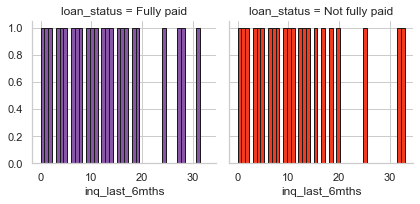

In [36]:
bins = np.linspace(df_sort_inq.inq_last_6mths.min(), df_sort_inq.inq_last_6mths.max(), 45)

g = sns.FacetGrid(df_sort_inq, col="loan_status", hue="loan_status", palette=['#8856a7', '#f03b20'])
g.map(plt.hist, 'inq_last_6mths', bins=bins, ec="k")

plt.show()

In [37]:
s_sort_dlq= df.groupby('delinq_2yrs')['fully_paid'].value_counts()
df_sort_dlq = s_sort_dlq.to_frame()

df_sort_dlq.rename(columns={'fully_paid':'count_in'},inplace=True)

df_sort_dlq.reset_index(inplace=True)
df_sort_dlq.rename(columns={'fully_paid':'loan_status'},inplace=True)
df_sort_dlq['loan_status'].replace({1:'Fully paid',0:'Not fully paid'},inplace=True)  
df_sort_dlq.sort_values(by=['count_in'], ascending=False, inplace=True)

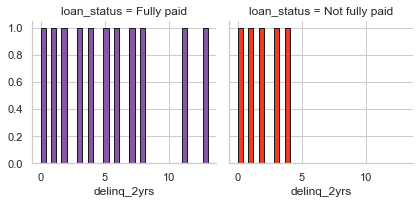

In [38]:
# similar
bins = np.linspace(df_sort_dlq.delinq_2yrs.min(), df_sort_dlq.delinq_2yrs.max(), 33)

g = sns.FacetGrid(df_sort_dlq, col="loan_status", hue="loan_status", palette=['#8856a7', '#f03b20'])
g.map(plt.hist, 'delinq_2yrs', bins=bins, ec="k")

plt.show()

In [39]:
s_sort_rec= df.groupby('pub_rec')['fully_paid'].value_counts()
df_sort_rec = s_sort_rec.to_frame()

df_sort_rec.rename(columns={'fully_paid':'count_in'},inplace=True)

df_sort_rec.reset_index(inplace=True)
df_sort_rec.rename(columns={'fully_paid':'loan_status'},inplace=True)
df_sort_rec['loan_status'].replace({1:'Fully paid',0:'Not fully paid'},inplace=True)  
df_sort_rec.sort_values(by=['count_in'], ascending=False, inplace=True)

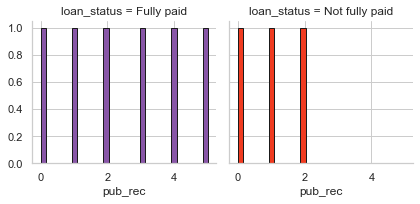

In [40]:
# similar
bins = np.linspace(df_sort_rec.pub_rec.min(), df_sort_rec.pub_rec.max(), 33)

g = sns.FacetGrid(df_sort_rec, col="loan_status", hue="loan_status", palette=['#8856a7', '#f03b20'])
g.map(plt.hist, 'pub_rec', bins=bins, ec="k")

plt.show()



<span style="color:black; font-size:20px" > Features such as **'days_with_cr_line', 'log_annual_inc', 'installment', 'dti', 'revol_util'**   seem to differ between the fully paid and not paid loans, as seen by comparing of the shapes and values of frequency distribution for each feature. </span>

# 2. Feature selection

For the first feature set, I select 'credit_policy','installment', 'log_annual_inc', 'dti', 'days_with_cr_line','revol_util' from the visualisations above.
For the second feature set, feature selection is performed with the SelectKBest() method and ANOVA-f measure from the scikit-learn library.


In [41]:
# from the visualisations above plus 1 categorical feature, credit_policy

all_features0 = df[['credit_policy','installment', 'log_annual_inc', 'dti', 'days_with_cr_line','revol_util']]

In [42]:
# KBest

from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest,f_classif


In [43]:
flist = ['int_rate', 'installment', 'log_annual_inc','dti', 'fico', 'days_with_cr_line', 'revol_bal', 'revol_util', \
       'inq_last_6mths','pub_rec']

In [44]:
features = df[flist].values
features.shape

(9578, 10)

In [45]:
Y = df['fully_paid'].values


In [46]:
fs = SelectKBest(score_func=f_classif, k=4)  # choose 4 features
fit_selected = fs.fit(features, Y)
fit_selected

SelectKBest(k=4)

In [47]:
fimportance = fit_selected.scores_

In [48]:
type(fimportance)

numpy.ndarray

In [49]:
print(fimportance)

[250.14120228  23.95686725  10.71979245  13.38566487 219.41737141
   8.19261323  27.69341779  64.96469182 218.77495366  22.7037686 ]


In [50]:
idx = np.argsort(fimportance)
idx

array([5, 2, 3, 9, 1, 6, 7, 8, 4, 0])

In [51]:
arr_i = np.array(flist)[idx]
arr_i

array(['days_with_cr_line', 'log_annual_inc', 'dti', 'pub_rec',
       'installment', 'revol_bal', 'revol_util', 'inq_last_6mths', 'fico',
       'int_rate'], dtype='<U17')

In [52]:
fimportance[idx]

array([  8.19261323,  10.71979245,  13.38566487,  22.7037686 ,
        23.95686725,  27.69341779,  64.96469182, 218.77495366,
       219.41737141, 250.14120228])

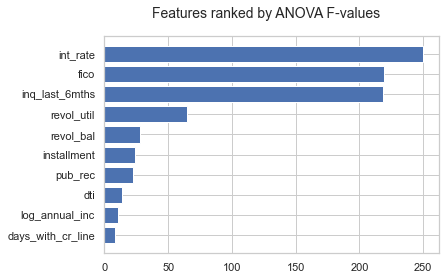

In [53]:
plt.barh(arr_i, fimportance[idx])
plt.suptitle('Features ranked by ANOVA F-values', fontsize=14)
plt.show()


##### Best 4 features are 'int_rate', 'fico', 'revol_util', 'inq_last_6mths'.

In [54]:
# taking these 4 best features plus a credit policy
all_features1 = df[['credit_policy','int_rate', 'fico', 'revol_util', 'inq_last_6mths']]

In [55]:
# Normalizing data
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
all_features_scaled0 = scaler.fit_transform(all_features0)
all_features_scaled0

all_features_scaled1 = scaler.fit_transform(all_features1)
all_features_scaled1

array([[ 0.49222226, -0.13931753,  0.68882488,  0.18270369, -0.71698894],
       [ 0.49222226, -0.57886837, -0.10130263,  1.03060231, -0.71698894],
       [ 0.49222226,  0.48648368, -0.75974223, -0.73068304, -0.26247044],
       ...,
       [-2.03160257, -0.57886837, -0.62805431,  1.24430034,  2.91915909],
       [-2.03160257,  1.39166043, -0.49636639, -1.50275334,  1.55560358],
       [-2.03160257,  0.61685894,  0.55713697,  0.35159406,  2.01012208]])

# 3. Correlation and PCA analysis

In [56]:
df.columns

Index(['credit_policy', 'purpose', 'int_rate', 'installment', 'log_annual_inc',
       'dti', 'fico', 'days_with_cr_line', 'revol_bal', 'revol_util',
       'inq_last_6mths', 'delinq_2yrs', 'pub_rec', 'fully_paid'],
      dtype='object')

In [106]:
numeric_cols = ['int_rate', 'installment', 'log_annual_inc',
       'dti', 'fico', 'days_with_cr_line', 'revol_bal', 'revol_util',
       'inq_last_6mths','pub_rec']
df_num = df[numeric_cols]
df_corr = df_num.corr()
df_corr

,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,pub_rec
int_rate,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124023,0.092527,0.464837,0.202780,0.098162
installment,0.276140,1.000000,0.448102,0.050202,0.086039,0.183305,0.233625,0.081356,-0.010419,-0.032760
log_annual_inc,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336895,0.372140,0.054881,0.029171,0.016506
dti,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,0.006209
fico,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263879,-0.015553,-0.541289,-0.185293,-0.147592
days_with_cr_line,-0.124023,0.183305,0.336895,0.060101,0.263879,1.000000,0.229346,-0.024240,-0.041737,0.071829
revol_bal,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229346,1.000000,0.203779,0.022394,-0.031010
revol_util,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024240,0.203779,1.000000,-0.013880,0.066717
inq_last_6mths,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041737,0.022394,-0.013880,1.000000,0.072673
pub_rec,0.098162,-0.032760,0.016506,0.006209,-0.147592,0.071829,-0.031010,0.066717,0.072673,1.000000


In [107]:
# int_rate/fico, revol_util/fico, int_rate/revol_util, log_annual_inc/installment, log_annual_inc/revol_bal seem to be significantly correlated.
df_big_corr = df_corr.apply(lambda x: [y if abs(y) >= 0.35 else 'less' for y in x])
df_big_corr

,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,pub_rec
int_rate,1,less,less,less,-0.714821,less,less,0.464837,less,less
installment,less,1,0.448102,less,less,less,less,less,less,less
log_annual_inc,less,0.448102,1,less,less,less,0.37214,less,less,less
dti,less,less,less,1,less,less,less,less,less,less
fico,-0.714821,less,less,less,1,less,less,-0.541289,less,less
days_with_cr_line,less,less,less,less,less,1,less,less,less,less
revol_bal,less,less,0.37214,less,less,less,1,less,less,less
revol_util,0.464837,less,less,less,-0.541289,less,less,1,less,less
inq_last_6mths,less,less,less,less,less,less,less,less,1,less
pub_rec,less,less,less,less,less,less,less,less,less,1


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0.5, 0, 'int_rate'),
  Text(1.5, 0, 'installment'),
  Text(2.5, 0, 'log_annual_inc'),
  Text(3.5, 0, 'dti'),
  Text(4.5, 0, 'fico'),
  Text(5.5, 0, 'days_with_cr_line'),
  Text(6.5, 0, 'revol_bal'),
  Text(7.5, 0, 'revol_util'),
  Text(8.5, 0, 'inq_last_6mths'),
  Text(9.5, 0, 'pub_rec')])

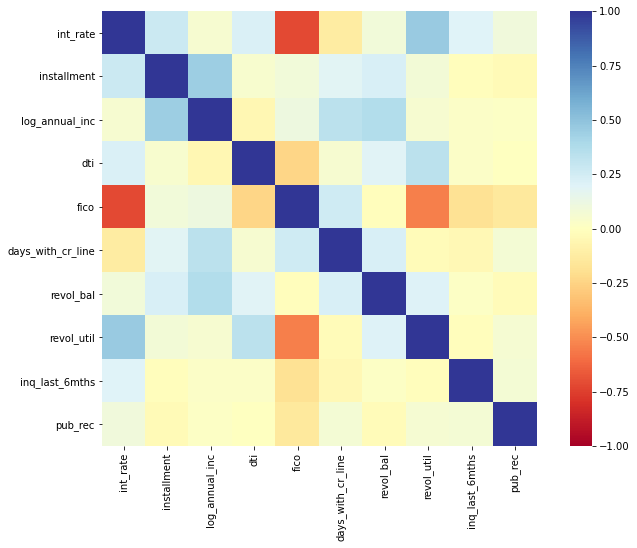

In [110]:
fig,ax = plt.subplots (figsize =(12,8))
sns.heatmap(df_corr, square=True, vmin =-1, vmax=1, cmap='RdYlBu')
plt.xticks(rotation=90)

### Principle Component Analysis

In [60]:
all_features2 = df[['credit_policy' ,'int_rate', 'installment', 'log_annual_inc',
       'dti', 'fico', 'days_with_cr_line', 'revol_bal', 'revol_util',
       'inq_last_6mths','pub_rec']]
all_features2.shape


(9578, 11)

In [61]:
# features excluding 'fico' as a feature due to 2 highly correlated pairs, fico/int_rate and fico/revol_util

all_features3 = df[['credit_policy' ,'int_rate', 'installment', 'log_annual_inc',
       'dti', 'days_with_cr_line', 'revol_bal', 'revol_util',
       'inq_last_6mths','pub_rec']]
all_features3.shape

(9578, 10)

In [62]:
# Normalizing data
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
all_features_scaled2 = scaler.fit_transform(all_features2)
all_features_scaled2

all_features_scaled3 = scaler.fit_transform(all_features3)
all_features_scaled3

array([[ 0.49222226, -0.13931753,  2.46309947, ...,  0.18270369,
        -0.71698894, -0.23700318],
       [ 0.49222226, -0.57886837, -0.43885443, ...,  1.03060231,
        -0.71698894, -0.23700318],
       [ 0.49222226,  0.48648368,  0.23070836, ..., -0.73068304,
        -0.26247044, -0.23700318],
       ...,
       [-2.03160257, -0.57886837, -1.06867038, ...,  1.24430034,
         2.91915909, -0.23700318],
       [-2.03160257,  1.39166043,  0.1569135 , ..., -1.50275334,
         1.55560358, -0.23700318],
       [-2.03160257,  0.61685894,  2.58060136, ...,  0.35159406,
         2.01012208, -0.23700318]])

In [63]:
y = df['fully_paid']
y.shape

(9578,)

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(all_features_scaled2, y, test_size = 0.2, random_state=18)

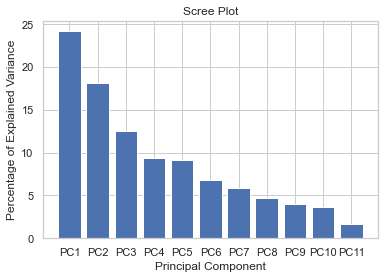

In [65]:
# Choosing the number of PCA components: it looks like each of the first 3 PCA components explain over 10% of varience.
from sklearn.decomposition import PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
import matplotlib.pyplot as plt    
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

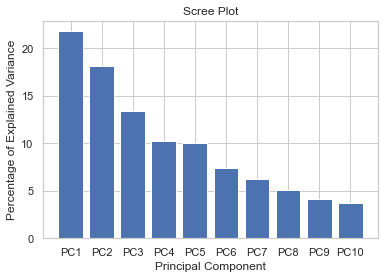

In [66]:
# Without fica. the first 5 PCA components are most pronounced.

X_train1, X_test1, y_train1, y_test1 = train_test_split(all_features_scaled3, y, test_size = 0.2, random_state=18)


from sklearn.decomposition import PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train1)
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
import matplotlib.pyplot as plt    
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

# 4. Modelling the loan payoff.

I use all features, the features selected from visualisations, and the features selected by KBest. Then I use the features from the PCA analysis and the features including a new designed feature. The Neural Networks model uses all features. I choose the model with the highest accuracy score for prediction.


In [67]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

### All features

#### Logistic regression

In [68]:
lr = LogisticRegression(solver = 'sag')
lr.fit(X_train, y_train)

print('Accuracy of RF classifier on training set: {:.6f}'
     .format(lr.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.6f}'
     .format(lr.score(X_test, y_test)))

Accuracy of RF classifier on training set: 0.841425
Accuracy of RF classifier on test set: 0.831420


#### Decision Tree and Random Forest models

In [69]:
dtc = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 6, random_state = 0).fit(X_train, y_train)

print('Accuracy of DT classifier on training set: {:.5f}'
     .format(dtc.score(X_train, y_train)))
print('Accuracy of DT classifier on test set: {:.5f}'
     .format(dtc.score(X_test, y_test)))

# max_depth=4, test acc = 83.3%

Accuracy of DT classifier on training set: 0.84260
Accuracy of DT classifier on test set: 0.83351


In [70]:
rf = RandomForestClassifier()
grid_values = {'max_depth': [3,4,6],'n_estimators': [10,12,14]}
grid_rf_auc = GridSearchCV( rf, param_grid = grid_values, cv=3, scoring='roc_auc')
grid_rf_auc.fit(X_train, y_train)
print('Grid best parameter (max. AUC): ', grid_rf_auc.best_params_)

rfc = RandomForestClassifier(n_estimators = 14, max_depth=4, max_features = None, random_state = 4).fit(X_train, y_train)

print('Accuracy of RF classifier on training set: {:.6f}'
     .format(rfc.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.6f}'
     .format(rfc.score(X_test, y_test)))

Grid best parameter (max. AUC):  {'max_depth': 3, 'n_estimators': 10}
Accuracy of RF classifier on training set: 0.842078
Accuracy of RF classifier on test set: 0.835073


In [71]:
# test acc = 83.51%

#### Gradient Boosting

In [ ]:
gr = GradientBoostingClassifier()
grid_values = {'learning_rate': [0.008,0.009],'n_estimators': [300,320]}
grid_grc = GridSearchCV( gr, param_grid = grid_values, cv=5, scoring='roc_auc')
grid_grc.fit(X_train, y_train)

print('Model best parameter (max. AUC): ', grid_grc.best_params_)
print('Model score (AUC): ', grid_grc.best_score_)
    
grc= GradientBoostingClassifier(learning_rate = 0.009, max_depth = 3, n_estimators=320).fit(X_train, y_train)
print('Accuracy of GB classifier on training set: {:.5f}'
     .format(grc.score(X_train, y_train)))
print('Accuracy of GB classifier on test set: {:.5f}'
     .format(grc.score(X_test, y_test)))

In [ ]:
# acc score 83.56%

#### Support Vector Classifier

In [ ]:
svm_r = SVC()
grid_values = [{'C':[1,10,100],'gamma':[0.001,0.003],'kernel': ['rbf']}]

optimal_params = GridSearchCV(svm_r,grid_values,cv=5, verbose=0)

optimal_params.fit(X_train, y_train)
optimal_params.best_params_

In [ ]:
svm_model = SVC(gamma=0.001, C = 1, kernel = 'rbf').fit(X_train, y_train)

print('Accuracy of SV classifier on training set: {:.5f}'
     .format(svm_model.score(X_train, y_train)))
print('Accuracy of SV classifier on test set: {:.5f}'
     .format(svm_model.score(X_test, y_test)))

In [ ]:
svm_l = SVC()
grid_values = [{'C':[1,10],'gamma':[0.001,0.005],'kernel': ['linear']}]

optimal_params = GridSearchCV(svm_l,grid_values,cv=5, verbose=0)

optimal_params.fit(X_train, y_train)
optimal_params.best_params_

In [ ]:
svm_model = SVC(gamma=0.001, C = 1, kernel = 'linear').fit(X_train, y_train)

print('Accuracy of SV classifier on training set: {:.5f}'
     .format(svm_model.score(X_train, y_train)))
print('Accuracy of SV classifier on test set: {:.5f}'
     .format(svm_model.score(X_test, y_test)))

#### Logistic binary classification

In [ ]:
lr = LogisticRegression(solver = 'sag')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)


#### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k = 15

knn_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)

print('Accuracy of KN classifier on training set: {:.5f}'
     .format(knn_model.score(X_train, y_train)))
print('Accuracy of KN classifier on test set: {:.5f}'
     .format(knn_model.score(X_test, y_test)))

In [ ]:
# Best k
Ks=18
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    
    #Train Model and Predict  
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = kNN_model.predict(X_test)
    
    
    mean_acc[n-1]=np.mean(yhat==y_test);
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

 ### 6 features - 'credit_policy','installment', 'log_annual_inc', 'dti', 'days_with_cr_line','revol_util'

In [ ]:
X_train0, X_test0, y_train0, y_test0 = train_test_split(all_features_scaled0, y, test_size = 0.2, random_state=18)

#### Random Forest

In [ ]:
rf = RandomForestClassifier()
grid_values = {'max_depth': [3,4,6],'n_estimators': [14,16,20]}
grid_rf_auc = GridSearchCV( rf, param_grid = grid_values, cv=3, scoring='roc_auc')
grid_rf_auc.fit(X_train0, y_train0)
print('Grid best parameter (max. AUC): ', grid_rf_auc.best_params_)

rfc = RandomForestClassifier(n_estimators = 14, max_depth=4, max_features = None, random_state = 4).fit(X_train0, y_train0)

print('Accuracy of RF classifier on training set: {:.6f}'
     .format(rfc.score(X_train0, y_train0)))
print('Accuracy of RF classifier on test set: {:.6f}'
     .format(rfc.score(X_test0, y_test0)))

#### Gradient Boosting

In [ ]:
gr = GradientBoostingClassifier()
grid_values = {'learning_rate': [0.009,0.1, 0.2],'n_estimators': [300,320]}
grid_grc = GridSearchCV( gr, param_grid = grid_values, cv=5, scoring='roc_auc')
grid_grc.fit(X_train0, y_train0)

print('Model best parameter (max. AUC): ', grid_grc.best_params_)
print('Model score (AUC): ', grid_grc.best_score_)
    
grc= GradientBoostingClassifier(learning_rate = 0.009, max_depth = 4, n_estimators=300).fit(X_train0, y_train0)
print('Accuracy of GB classifier on training set: {:.5f}'
     .format(grc.score(X_train0, y_train0)))
print('Accuracy of GB classifier on test set: {:.5f}'
     .format(grc.score(X_test0, y_test0)))

#### Support Vector

In [ ]:
svm_l = SVC()
grid_values = [{'C':[1,10],'gamma':[0.001,0.005],'kernel': ['linear']}]

optimal_params = GridSearchCV(svm_l,grid_values,cv=5, verbose=0)

optimal_params.fit(X_train0, y_train0)
optimal_params.best_params_

svm_model = SVC(gamma=0.001, C = 1, kernel = 'linear').fit(X_train0, y_train0)

print('Accuracy of SV classifier on training set: {:.5f}'
     .format(svm_model.score(X_train0, y_train0)))
print('Accuracy of SV classifier on test set: {:.5f}'
     .format(svm_model.score(X_test0, y_test0)))

#### Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = 'sag')
lr.fit(X_train0, y_train0)
lr.score(X_test0, y_test0)

#### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  
k = 13

knn_model = KNeighborsClassifier(n_neighbors=k).fit(X_train0,y_train0)

print('Accuracy of KN classifier on training set: {:.5f}'
     .format(knn_model.score(X_train0, y_train0)))
print('Accuracy of KN classifier on test set: {:.5f}'
     .format(knn_model.score(X_test0, y_test0)))

In [ ]:
# Best k
Ks=18
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    
    #Train Model and Predict  
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train0,y_train0)
    yhat = kNN_model.predict(X_test0)
    
    
    mean_acc[n-1]=np.mean(yhat==y_test0);
    
    std_acc[n-1]=np.std(yhat==y_test0)/np.sqrt(yhat.shape[0])
mean_acc

### 5 features - 'credit_policy','int_rate', 'fico','revol_util', 'inq_last_6mths'

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(all_features_scaled1, y, test_size = 0.2, random_state=18)

#### Random Forest

In [ ]:
rf = RandomForestClassifier()
grid_values = {'max_depth': [4,6],'n_estimators': [24,26,30]}
grid_rf_auc = GridSearchCV( rf, param_grid = grid_values, cv=3, scoring='roc_auc')
grid_rf_auc.fit(X_train1, y_train1)
print('Grid best parameter (max. AUC): ', grid_rf_auc.best_params_)

rfc = RandomForestClassifier(n_estimators = 26, max_depth=4, max_features = None, random_state = 4).fit(X_train1, y_train1)

print('Accuracy of RF classifier on training set: {:.6f}'
     .format(rfc.score(X_train1, y_train1)))
print('Accuracy of RF classifier on test set: {:.6f}'
     .format(rfc.score(X_test1, y_test1)))

#### Gradient Boosting

In [ ]:
gr = GradientBoostingClassifier()
grid_values = {'learning_rate': [0.008,0.009],'n_estimators': [300,320]}
grid_grc = GridSearchCV( gr, param_grid = grid_values, cv=5, scoring='roc_auc')
grid_grc.fit(X_train1, y_train1)

print('Model best parameter (max. AUC): ', grid_grc.best_params_)
print('Model score (AUC): ', grid_grc.best_score_)
    
grc= GradientBoostingClassifier(learning_rate = 0.009, max_depth = 4, n_estimators=320).fit(X_train1, y_train1)
print('Accuracy of GB classifier on training set: {:.5f}'
     .format(grc.score(X_train1, y_train1)))
print('Accuracy of GB classifier on test set: {:.5f}'
     .format(grc.score(X_test1, y_test1)))

#### Support Vector

In [ ]:
svm_l = SVC()
grid_values = [{'C':[0.5, 1],'gamma':[0.001,0.005],'kernel': ['linear']}]

optimal_params = GridSearchCV(svm_l,grid_values,cv=5, verbose=0)

optimal_params.fit(X_train1, y_train1)
optimal_params.best_params_

svm_model = SVC(gamma=0.001, C = 1, kernel = 'linear').fit(X_train1, y_train1)

print('Accuracy of SV classifier on training set: {:.5f}'
     .format(svm_model.score(X_train1, y_train1)))
print('Accuracy of SV classifier on test set: {:.5f}'
     .format(svm_model.score(X_test1, y_test1)))

#### Logistic regression

In [ ]:
lr = LogisticRegression(solver = 'sag')
lr.fit(X_train1, y_train1)
lr.score(X_test1, y_test1)

#### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  
k = 13

knn_model = KNeighborsClassifier(n_neighbors=k).fit(X_train1,y_train1)

print('Accuracy of KN classifier on training set: {:.5f}'
     .format(knn_model.score(X_train1, y_train1)))
print('Accuracy of KN classifier on test set: {:.5f}'
     .format(knn_model.score(X_test1, y_test1)))

In [ ]:
# Best k
Ks=18
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    
    #Train Model and Predict  
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train1,y_train1)
    yhat = kNN_model.predict(X_test1)
    
    
    mean_acc[n-1]=np.mean(yhat==y_test1);
    
    std_acc[n-1]=np.std(yhat==y_test1)/np.sqrt(yhat.shape[0])
mean_acc

#### Adding a new feature as multiplication of 3 columns

In [ ]:
df['mult_int_fico'] = df['fico'] * df['int_rate'] * df['revol_util']
df

In [ ]:
#int_rate/fico, revol_util/fico

In [ ]:
all_feactures5 = [ 'installment', 'log_annual_inc','dti', 'days_with_cr_line', 'revol_bal', 'revol_util',
       'inq_last_6mths','pub_rec','mult_int_fico']
df_num = df[all_feactures5]
df_corr = df_num.corr()
df_corr

In [ ]:
n_features = df[all_feactures5]
n_features_scaled = scaler.fit_transform(n_features)
n_features_scaled

In [ ]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(n_features_scaled, y, test_size = 0.2, random_state=18)

#### Adding 3 new features as multiplication of 

    -int_rate/fico, revol_util/fico
    -log_annual_inc, int_rate
    -int_rate, revol_util

In [ ]:
#int_rate/fico, revol_util/fico

# log_annual_inc, installment
# int_rate, revol_util
#df['log_installment'] = np.log(df['installment'])
df['mult_inc_inst']  = df['log_annual_inc'] * df['installment'] 
df['mult_int_re_util'] = df['int_rate'] * df['revol_util']
df.columns

In [ ]:
all_feactures6 = ['credit_policy','dti', 'days_with_cr_line', 'revol_bal',
       'inq_last_6mths','pub_rec','mult_int_fico','mult_inc_inst','mult_int_re_util']

In [ ]:
n_features6 = df[all_feactures6]
n_features_scaled6 = scaler.fit_transform(n_features6)

In [ ]:
X_train6, X_test6, y_train6, y_test6 = train_test_split(n_features_scaled6, y, test_size = 0.2, random_state=18)

#### Random Forest Classifier

In [ ]:
# 0.836117 n_est=20, max_depth=6
rf = RandomForestClassifier()
grid_values = {'max_depth': [4,6],'n_estimators': [18,20,24]}
grid_rf_auc = GridSearchCV( rf, param_grid = grid_values, cv=3, scoring='roc_auc')
grid_rf_auc.fit(X_train5, y_train5)
print('Grid best parameter (max. AUC): ', grid_rf_auc.best_params_)

rfc = RandomForestClassifier(n_estimators = 20, max_depth=4, max_features = None, random_state = 4).fit(X_train5, y_train5)

print('Accuracy of RF classifier on training set: {:.6f}'
     .format(rfc.score(X_train5, y_train5)))
print('Accuracy of RF classifier on test set: {:.6f}'
     .format(rfc.score(X_test5, y_test5)))

#### Gradient Boosting Classifier

In [ ]:
# 0.83455
gr = GradientBoostingClassifier()
grid_values = {'learning_rate': [0.008,0.009],'n_estimators': [300,320]}
grid_grc = GridSearchCV( gr, param_grid = grid_values, cv=5, scoring='roc_auc')
grid_grc.fit(X_train5, y_train5)

print('Model best parameter (max. AUC): ', grid_grc.best_params_)
print('Model score (AUC): ', grid_grc.best_score_)
    
grc= GradientBoostingClassifier(learning_rate = 0.009, max_depth = 4, n_estimators=320).fit(X_train5, y_train5)
print('Accuracy of GB classifier on training set: {:.5f}'
     .format(grc.score(X_train5, y_train5)))
print('Accuracy of GB classifier on test set: {:.5f}'
     .format(grc.score(X_test5, y_test5)))

In [ ]:
# 0.83559

 #### Support Vector Classifier

In [ ]:
# 0.83507
svm_l = SVC()
grid_values = [{'C':[0.5,1],'gamma':[0.001,0.005],'kernel': ['linear']}]

optimal_params = GridSearchCV(svm_l,grid_values,cv=5, verbose=0)

optimal_params.fit(X_train5, y_train5)
print(optimal_params.best_params_)

svm_model = SVC(gamma=0.001, C = 1, kernel = 'linear').fit(X_train5, y_train5)

print('Accuracy of SV classifier on training set: {:.5f}'
     .format(svm_model.score(X_train5, y_train5)))
print('Accuracy of SV classifier on test set: {:.5f}'
     .format(svm_model.score(X_test5, y_test5)))

#### KNN

In [ ]:
# 0.83664
from sklearn.neighbors import KNeighborsClassifier  
k = 13

knn_model = KNeighborsClassifier(n_neighbors=k).fit(X_train5,y_train5)

print('Accuracy of KN classifier on training set: {:.5f}'
     .format(knn_model.score(X_train5, y_train5)))
print('Accuracy of KN classifier on test set: {:.5f}'
     .format(knn_model.score(X_test5, y_test5)))

In [ ]:
# Best k
Ks=18
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    
    #Train Model and Predict  
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train5,y_train5)
    yhat = kNN_model.predict(X_test5)
    
    
    mean_acc[n-1]=np.mean(yhat==y_test5);
    
    std_acc[n-1]=np.std(yhat==y_test5)/np.sqrt(yhat.shape[0])
mean_acc

#### Random Forest Classifier

In [ ]:
rf = RandomForestClassifier()
grid_values = {'max_depth': [4,6],'n_estimators': [18,20,24]}
grid_rf_auc = GridSearchCV( rf, param_grid = grid_values, cv=3, scoring='roc_auc')
grid_rf_auc.fit(X_train6, y_train6)
print('Grid best parameter (max. AUC): ', grid_rf_auc.best_params_)

rfc = RandomForestClassifier(n_estimators = 20, max_depth=4, max_features = None, random_state = 4).fit(X_train6, y_train6)

print('Accuracy of RF classifier on training set: {:.6f}'
     .format(rfc.score(X_train6, y_train6)))
print('Accuracy of RF classifier on test set: {:.6f}'
     .format(rfc.score(X_test6, y_test6)))

#### Gradient Boosting Classifier

In [ ]:
gr = GradientBoostingClassifier()
grid_values = {'learning_rate': [0.008,0.009],'n_estimators': [300,320]}
grid_grc = GridSearchCV( gr, param_grid = grid_values, cv=5, scoring='roc_auc')
grid_grc.fit(X_train6, y_train6)

print('Model best parameter (max. AUC): ', grid_grc.best_params_)
print('Model score (AUC): ', grid_grc.best_score_)
    
grc= GradientBoostingClassifier(learning_rate = 0.009, max_depth = 4, n_estimators=320).fit(X_train6, y_train6)
print('Accuracy of GB classifier on training set: {:.5f}'
     .format(grc.score(X_train6, y_train6)))
print('Accuracy of GB classifier on test set: {:.5f}'
     .format(grc.score(X_test6, y_test6)))

 #### Support Vector Classifier

In [ ]:
svm_l = SVC()
grid_values = [{'C':[0.5,1],'gamma':[0.001,0.005],'kernel': ['linear']}]

optimal_params = GridSearchCV(svm_l,grid_values,cv=5, verbose=0)

optimal_params.fit(X_train6, y_train6)
print(optimal_params.best_params_)

svm_model = SVC(gamma=0.001, C = 1, kernel = 'linear').fit(X_train6, y_train6)

print('Accuracy of SV classifier on training set: {:.5f}'
     .format(svm_model.score(X_train6, y_train6)))
print('Accuracy of SV classifier on test set: {:.5f}'
     .format(svm_model.score(X_test6, y_test6)))

#### KNN

In [ ]:
# 0.83873 k =14

from sklearn.neighbors import KNeighborsClassifier  
k = 16

knn_model = KNeighborsClassifier(n_neighbors=k).fit(X_train6,y_train6)

print('Accuracy of KN classifier on training set: {:.5f}'
     .format(knn_model.score(X_train6, y_train6)))
print('Accuracy of KN classifier on test set: {:.5f}'
     .format(knn_model.score(X_test6, y_test6)))

In [ ]:
Ks=18
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    
    #Train Model and Predict  
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train6,y_train6)
    yhat = kNN_model.predict(X_test6)
    
    
    mean_acc[n-1]=np.mean(yhat==y_test6);
    
    std_acc[n-1]=np.std(yhat==y_test6)/np.sqrt(yhat.shape[0])
mean_acc

### PCA Models

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(all_features2, y, test_size = 0.2, random_state=18)

scaler = StandardScaler()
#scaler.fit(X_train_pca)

X_train_scpca = scaler.fit_transform(X_train_pca) # do it this way not to leak the data from the test set.
X_test_scpca = scaler.transform(X_test_pca)

In [ ]:
# Excluding fica as a feature
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(all_features2, y, test_size = 0.2, random_state=18)

scaler = StandardScaler()

X_train_scpca = scaler.fit_transform(X_train_pca) # do it this way not to leak the data from the test set.
X_test_scpca = scaler.transform(X_test_pca)

In [ ]:
pca = PCA(n_components = 5).fit(X_train_scpca) # fitting PCA on the training set.

Xtrain_pca = pca.transform(X_train_scpca)
Xtest_pca = pca.transform(X_test_scpca)

#### Gradient Boosting Classifier()

In [ ]:
gr = GradientBoostingClassifier()
grid_values = {'learning_rate': [0.008,0.009],'n_estimators': [300,320]}
grid_grc = GridSearchCV( gr, param_grid = grid_values, cv=5, scoring='roc_auc')
grid_grc.fit(Xtrain_pca, y_train_pca)

print('Model best parameter (max. AUC): ', grid_grc.best_params_)
print('Model score (AUC): ', grid_grc.best_score_)
    
grc= GradientBoostingClassifier(learning_rate = 0.008, max_depth = 4, n_estimators=300).fit(Xtrain_pca, y_train_pca)
print('Accuracy of GB classifier on training set: {:.5f}'
     .format(grc.score(Xtrain_pca, y_train_pca)))
print('Accuracy of GB classifier on test set: {:.5f}'
     .format(grc.score(Xtest_pca, y_test_pca)))

In [ ]:
# Accuracy of GB classifier on test set: 0.83507

In [ ]:
pred_loan = grc.predict_proba(Xtest_pca)[:, 1].astype(np.float32)
answer_gbc = pd.Series(pred_loan)
df['fully_paid_prediction'] = answer_gbc
answer_gbc

#### Support Vector Classifier(SVC)

In [ ]:
svm_r = SVC()
grid_values = [{'C':[0.5,1],'gamma':[0.001,0.003],'kernel': ['rbf']}]

grid_svc = GridSearchCV(svm_r,grid_values,cv=5, verbose=0)

grid_svc.fit(Xtrain_pca, y_train_pca)
print('Model best parameter: ', grid_svc.best_params_)

svc_model = SVC(gamma=0.001, C = 1, kernel = 'rbf').fit(Xtrain_pca, y_train_pca)

print('Accuracy of SV classifier on training set: {:.5f}'
     .format(svc_model.score(Xtrain_pca, y_train_pca)))
print('Accuracy of SV classifier on test set: {:.5f}'
     .format(svc_model.score(Xtest_pca, y_test_pca)))

#### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k = 13

knn_model = KNeighborsClassifier(n_neighbors=k).fit(Xtrain_pca, y_train_pca)

print('Accuracy of KN classifier on training set: {:.5f}'
     .format(knn_model.score(Xtrain_pca, y_train_pca)))
print('Accuracy of KN classifier on test set: {:.5f}'
     .format(knn_model.score(Xtest_pca, y_test_pca)))

In [ ]:
# Best k
Ks=18
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    
    #Train Model and Predict  
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(Xtrain_pca, y_train_pca)
    yhat = kNN_model.predict(Xtest_pca)
    
    
    mean_acc[n-1]=np.mean(yhat==y_test_pca);
    
    std_acc[n-1]=np.std(yhat==y_test_pca)/np.sqrt(yhat.shape[0])
mean_acc

#### Random Forest

In [ ]:
rf = RandomForestClassifier()
grid_values = {'max_depth': [3,4,6],'n_estimators': [10,12,14]}
grid_rf_auc = GridSearchCV( rf, param_grid = grid_values, cv=3, scoring='roc_auc')
grid_rf_auc.fit(Xtrain_pca, y_train_pca)
print('Grid best parameter (max. AUC): ', grid_rf_auc.best_params_)

rfc = RandomForestClassifier(n_estimators = 10, max_depth=3, max_features = None, random_state = 4).fit(Xtrain_pca, y_train_pca)

print('Accuracy of RF classifier on training set: {:.6f}'
     .format(rfc.score(Xtrain_pca, y_train_pca)))
print('Accuracy of RF classifier on test set: {:.6f}'
     .format(rfc.score(Xtest_pca, y_test_pca)))

## Neural Networks

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
#

In [ ]:

model = Sequential()
 
model.add(Dense(6, input_dim=11, kernel_initializer='normal', activation='relu'))

model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    # Output layer with a binary classification ('paid' or not 'paid')
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
   
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
model.fit(X_train, y_train, epochs=20,verbose=2,validation_data=(X_test, y_test))

In [ ]:
score, acc = model.evaluate(X_test, y_test, batch_size=32,  verbose=2)
print('NN Test score:', score)
print('NN Test accuracy:', acc)

# epochs = 5, validation_split =0.2

In [ ]:
# 20 epochs  - accuracy of 83.51%

In [ ]:
# another NN model

In [ ]:
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-07, amsgrad = False)
model2 = Sequential()
model2.add(Dense(250, input_dim = 11, kernel_initializer='normal',activation='relu'))
model2.add(Dense(500,activation = 'relu'))
model2.add(Dropout(0.1))
model2.add(Dense(1000, activation = 'relu'))
model2.add(Dropout(0.1))
model2.add(Dense(1000, activation = 'relu'))
model2.add(Dropout(0.1))
model2.add(Dense(500, activation = 'relu'))
model2.add(Dropout(0.1))
model2.add(Dense(250, activation = 'relu'))
model2.add(Dropout(0.1))
model2.add(Dense(1, activation = 'linear'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model2.fit (X_train, y_train, epochs=20,verbose=2,validation_data=(X_test, y_test))

In [ ]:
score, acc = model2.evaluate(X_test, y_test, batch_size=32,  verbose=2)
print('Model_2 Test score:', score)
print('Model_2 Test accuracy:', acc)

# 5. Predicting the loan payoff.
Best performing model is the KNN model with 3 added features giving an accuracy of 0.8398 (84%) on test data.

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=16).fit(X_train6,y_train6)

print('Accuracy of KN classifier on test set: {:.5f}'
     .format(knn_model.score(X_test6, y_test6)))

In [ ]:
pred_loan = knn_model.predict_proba(X_test6)[:, 1].astype(np.float32)
answer = pd.Series(pred_loan)
answer


### Judging Criteria
| CATEGORY | WEIGHTAGE | DETAILS                                                              |
|:---------|:----------|:---------------------------------------------------------------------|
| **Analysis** | 30%       | <ul><li>Documentation on the goal and what was included in the analysis</li><li>How the question was approached</li><li>Visualisation tools and techniques utilized</li></ul>       |
| **Results**  | 30%       | <ul><li>How the results derived related to the problem chosen</li><li>The ability to trigger potential further analysis</li></ul> |
| **Creativity** | 40% | <ul><li>How "out of the box" the analysis conducted is</li><li>Whether the publication is properly motivated and adds value</li></ul> |